# Logistic Regression

**Author:** Jhosimar George Arias Figueroa

## Introdution

This notebook is intended to be a guide for a better understanding of the implementation for Logistic Regression. We will implement it from scratch with numpy and with the sklearn package.

## Load Data

In [0]:
import numpy as np
from matplotlib import pyplot as plt

We will load data from sklearn

In [2]:
from sklearn import datasets, linear_model
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
#y = y[:,np.newaxis]

print('Data size: ' , X.shape)

('Data size: ', (150, 2))


Split dataset in train and test

In [3]:
def dataset_partition(X, y, proportion):
  num_samples = X.shape[0]
  
  # randomly partition the indices based on specified proportion
  indices = np.random.permutation(num_samples)

  # get train and test according to the given proportion 
  train_size = int(num_samples * proportion)
  X_train, y_train = X[indices][:train_size], y[indices][:train_size]
  X_test, y_test = X[indices][train_size:], y[indices][train_size:]
  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = dataset_partition(X, y, 0.7)

print('Train size: ', X_train.shape, ' Test size: ', X_test.shape)

('Train size: ', (105, 2), ' Test size: ', (45, 2))


Let's plot the train and test generated datasets

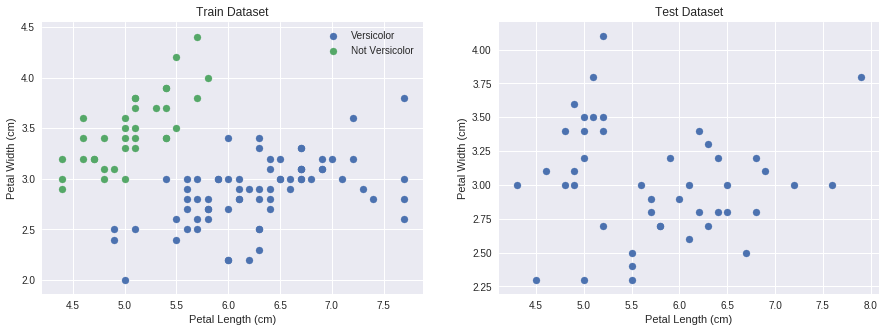

In [4]:
plt.subplots(figsize =(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1])
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])
plt.legend(['Versicolor', 'Not Versicolor'])
plt.title('Train Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:,0], X_test[:,1])
plt.title('Test Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

Reshaping the target variable for application with the **sklearn** library

In [0]:
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

## Model Implementation

We will implement Linear Regression first with **numpy** and then with **sklearn**

### Numpy

In [0]:
import numpy as np

class LogisticRegression:
  
  def __init__(self, **params):
    """ Initialize global parameters of the class

    Parameters:
    ------------
        iterations: int, optional
             Number of gradient descent iterations
             
        learning_rate: float, optional     
             Learning rate used in gradient descent
        
        verbose: int, optional
             Print information during training at each specified iteration
        
        fit_intercept: boolean, optional
             Whether to add the intercept (bias) or not
        
    """ 
    self.iterations = params.get('iterations', 10)
    self.alpha = params.get('learning_rate', 1e-3)
    self.print_it = params.get('verbose', -1)
    self.fit_intercept = params.get('fit_intercept', True)
    
    
  def add_intercept(self, X):
    """ Add intercept of ones to input data
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        
    Returns:
    ---------
        Sigmoid functino applied to the input matrix
    """
    ones = np.ones((X.shape[0], 1))
    return np.hstack( (ones, X) )
  
  
  def sigmoid(self, z):
    """ Compute value of the activation function
        
    Parameters:
    ------------
        z : numpy array, shape = [n, m]
        
    Returns:
    ---------
        Sigmoid function applied to the input matrix
    """
    return 1/(1 + np.exp(-z))
  
  
  def cost_function(self, X, W, y):
    """ Compute value of the cost function and its gradient
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        W : numpy array, shape = [n_features, num_classes]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        cost: value of the cost function given the true and predicted values
        grad: value of the cost function's gradient
    """    
    n = X.shape[0]
    # logits
    logit = X.dot(W)
    # apply sigmoid function
    y_pred = self.sigmoid(logit)
    # binary cross entropy loss
    loss = np.mean(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))
    # binary cross entropy gradient
    grad = X.T.dot(y_pred - y)/n
    return loss, grad
  
  
  def gradient_descent(self, X, y):
    """ Compute values of parameters W
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        W: parameters after training process
        cost_history: cost function at each iteration
        
    """
    n, d = X.shape[0], X.shape[1]
    
    # initialize weights with 0's
    W = np.zeros((d, 1))
    cost_history = []
    
    # improve weights according to the given number of iterations
    for it in range(self.iterations):
      # calculate the cost function and its gradient
      cost, grad = self.cost_function(X, W, y)
      
      # update W given gradient and learning rate
      W = W - self.alpha * grad
      cost_history.append(cost)
    return W, cost_history
  
  
  def train(self, X,y):
    """ Compute value of parametes W according to training data set and method
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        self: object
        
    """ 
    
    # if only one dimension, reshape data
    if len(X.shape) == 1:
      X = X.reshape(-1,1)
    if len(y.shape) == 1:
      y = y.reshape(-1,1)
    if self.fit_intercept:
      X = self.add_intercept(X)
      
    self.W, cost_history = self.gradient_descent(X, y)
    
    for it in range(self.iterations):
      if self.print_it > 0 and it % self.print_it == 0:
        print( "it: %d, cost: %.3lf" % (it, cost_history[it]) )
    
    
  def predict_prob(self,X):
    """ Predict values given new data
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        
    Returns:
    ---------
        Predicted values by using the learng parameters W
    """    
    if self.fit_intercept:
      X = self.add_intercept(X)
    logit = X.dot(self.W)
    return self.sigmoid(logit)
  
  
  def predict(self, X, threshold=0.5):
    """ Classify new data given a threshold
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        threshold: float
        
    Returns:
    ---------
        Predicted values thresholded by input value
    """    
    return self.predict_prob(X) >= threshold

Let's create a model using our implementation and test it

In [0]:
model = LogisticRegression(iterations=30000, learning_rate=0.01,verbose=5000)

Let's fit the model with our training data

In [8]:
model.train(X_train,y_train)

it: 0, cost: 0.693
it: 5000, cost: 0.111
it: 10000, cost: 0.070
it: 15000, cost: 0.054
it: 20000, cost: 0.045
it: 25000, cost: 0.039


Let's predict values for our testing data

In [0]:
y_pred = model.predict(X_test, 0.5)

To evaluate our predictions, we will use the accuracy

In [10]:
def accuracy(y_pred, y_test):
  if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)
    
  if len(y_pred.shape) == 1:
    y_pred = y_pred.reshape(-1, 1)
  return (y_pred == y_test).mean()

accuracy(y_pred, y_test)

0.9777777777777777

Let's plot the decision boundary obtained by our model

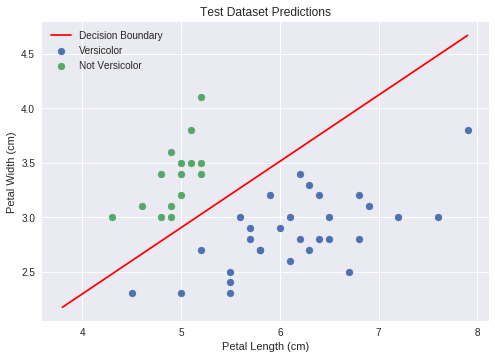

In [11]:
def plot_linear_decision_boundary(X_test, y_pred, W = None):
  if len(y_pred.shape) > 1:
    y_pred = y_pred[:,0]
  plt.scatter(X_test[y_pred==1,0], X_test[y_pred==1,1], label='Versicolor')
  plt.scatter(X_test[y_pred==0,0], X_test[y_pred==0,1], label='Not Versicolor')

  # decision boundary
  if W is not None:
    if len(W.shape) > 1:
      W = W[:,0]
    x_values = [np.min(X_test[:, 0]) - .5, np.max(X_test[:, 0])]
    y_values = -(W[0] + np.dot(W[1], x_values)) / W[2]
    plt.plot(x_values, y_values, label='Decision Boundary', c='red')
  
  plt.title('Test Dataset Predictions')
  plt.xlabel('Petal Length (cm)')
  plt.ylabel('Petal Width (cm)')
  plt.legend()
  plt.show()

plot_linear_decision_boundary(X_test, y_pred, model.W)

### Scikit-learn library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [0]:
from sklearn import linear_model

In [0]:
model = linear_model.LogisticRegression()

In [14]:
model.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = model.predict(X_test)

In [16]:
accuracy(y_pred, y_test)

0.9777777777777777

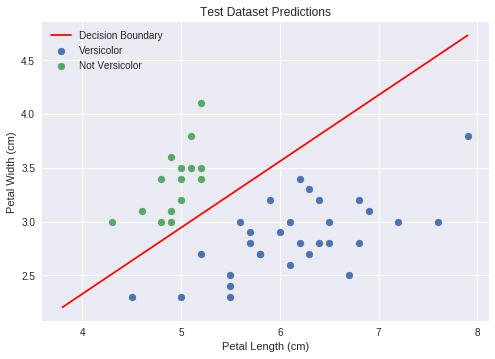

In [17]:
W_model = np.hstack([[model.intercept_], model.coef_])
plot_linear_decision_boundary(X_test, y_pred, W_model[0])

### Non-Linear Boundary

In [18]:
from sklearn.datasets import make_circles
#X, y = make_circles(n_samples=200, noise=0.05)
X, y = make_circles(n_samples=200, noise=0.1)

print('Data size: ' , X.shape)

('Data size: ', (200, 2))


Split dataset into train and test

In [0]:
X_train, y_train, X_test, y_test = dataset_partition(X, y, 0.7)

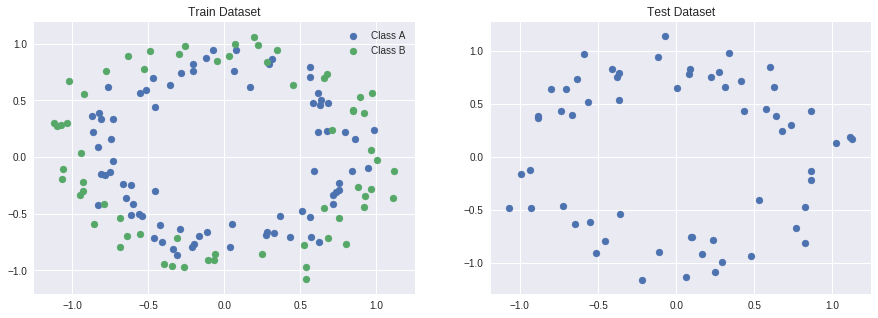

In [20]:
plt.subplots(figsize =(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1])
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])
plt.legend(['Class A', 'Class B'])
plt.title('Train Dataset')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:,0], X_test[:,1])
plt.title('Test Dataset')
plt.show()

#### Model

In [21]:
model = LogisticRegression(iterations=15000, learning_rate=0.01,verbose=5000)
model.train(X_train,y_train)
y_pred = model.predict(X_test, 0.5)

it: 0, cost: 0.693
it: 5000, cost: 0.688
it: 10000, cost: 0.688


In [22]:
(y_pred == y_test).mean()

0.38333333333333336

The accuracy is pretty low, let's plot the decision boundary

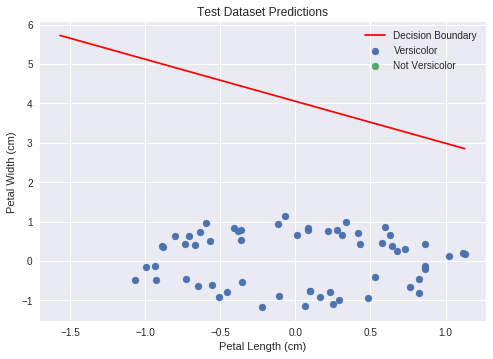

In [23]:
plot_linear_decision_boundary(X_test, y_pred, model.W)

Because we were using a simple linear model for classification, the decision boundary is not very helpful. Thus, we require a complex model. Maybe a polynomial?

#### Adding Polynomial Features 

We can generate polynomial features by using the the package preprocessing. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [25]:
print 'Original Shape: ', X_train.shape
print 'New Shape: ', X_train_poly.shape

Original Shape:  (140, 2)
New Shape:  (140, 6)


Let's use our **numpy** implementation

In [26]:
#model = LogisticRegression(iterations=200000, learning_rate=1.0,verbose=50000)
model = LogisticRegression(iterations=100000, learning_rate=0.1,verbose=10000)
model.train(X_train_poly,y_train)
y_pred = model.predict(X_test_poly, 0.5)

it: 0, cost: 0.693
it: 10000, cost: 0.360
it: 20000, cost: 0.354
it: 30000, cost: 0.353
it: 40000, cost: 0.353
it: 50000, cost: 0.353
it: 60000, cost: 0.353
it: 70000, cost: 0.353
it: 80000, cost: 0.353
it: 90000, cost: 0.353


In [27]:
accuracy(y_pred, y_test)

0.8166666666666667

In [0]:
def plot_decision_boundary(X_test, y_pred, W = None, poly = None):
  if len(y_pred.shape) > 1:
    y_pred = y_pred[:,0]
  plt.scatter(X_test[y_pred==1,0], X_test[y_pred==1,1])#, label='Class A')
  plt.scatter(X_test[y_pred==0,0], X_test[y_pred==0,1])#, label='Class B')
  
  legend = ['Class A', 'Class B']
  
  # decision boundary
  if W is not None:
    #if len(W.shape) > 1:
    #  W = W[:,0]
    
    # create coordinates
    u = np.linspace(-1.2, 1.2, 50)
    v = np.linspace(-1.2, 1.2, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    
    # calculate features for the coordinates (u,v)
    X_plot_data = np.vstack([U, V]).T
    X_plot_poly = poly.fit_transform(X_plot_data)
 
    # if intercept was included in weights
    if len(W.shape) == 1 + len(X_plot_poly.shape[1:]):
      ones = np.ones((X_plot_poly.shape[0], 1))
      X_plot_poly = np.hstack([ones, X_plot_poly])
    
    # calculate logits
    Z = X_plot_poly.dot(W)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = plt.contour(U,V,Z,levels=[0],colors='R')
    legend.append('Decision Boundary')
    
  plt.title('Test Dataset Predictions')
  plt.legend(labels=legend)
  plt.show()

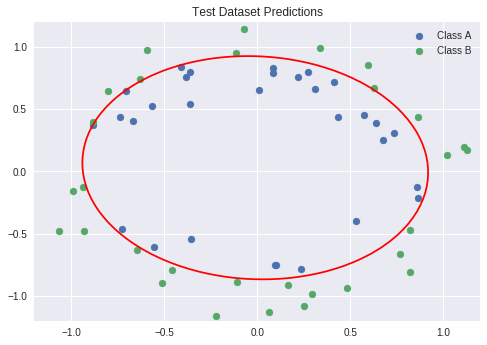

In [29]:
plot_decision_boundary(X_test, y_pred, model.W, poly)

Let's use the **sklearn** library

In [0]:
# we set C as a large value because at this point we do not want to perform regularization
model = linear_model.LogisticRegression(C=1000)
model.fit(X_train_poly,y_train)
y_pred = model.predict(X_test_poly)

In [31]:
accuracy(y_pred, y_test)

0.8166666666666667

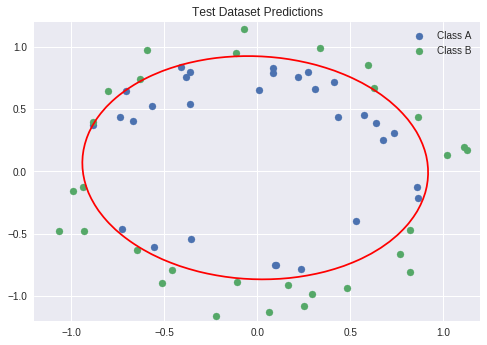

In [32]:
W_model = np.hstack([[model.intercept_], model.coef_]).T
plot_decision_boundary(X_test, y_pred, W_model, poly)

Let's try a polynomial with larger degree

In [33]:
poly = PolynomialFeatures(10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print 'Original Shape: ', X_train.shape
print 'New Shape: ', X_train_poly.shape

Original Shape:  (140, 2)
New Shape:  (140, 66)


In [0]:
# we set C as a large value because at this point we do not want to perform regularization
model = linear_model.LogisticRegression(C=1000)
model.fit(X_train_poly,y_train)
y_pred = model.predict(X_test_poly)

In [35]:
accuracy(y_pred, y_test)

0.7333333333333333

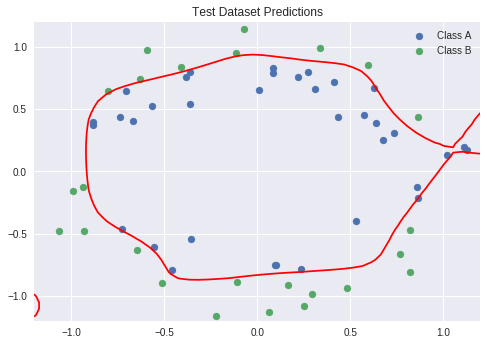

In [36]:
W_model = np.hstack([[model.intercept_], model.coef_]).T
plot_decision_boundary(X_test, y_pred, W_model, poly)

We see that with a larger degree we suffer of overfitting, that is why we obtain a lower accuracy value for the test data.